<a href="https://colab.research.google.com/github/nisa3yulinda/dashboard_bike_sharing/blob/main/Nisa_Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nisa Tri Yulinda
- **Email:** m229d4kx2797@bangkit.academy
- **ID Dicoding:** M229D4KX2797

## Menentukan Pertanyaan Bisnis

1.   How does the season affect the number of bicycles borrowed?
2.  How do holidays affect the number of bicycles borrowed?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bikeDay = pd.read_csv("/content/drive/MyDrive/Proyek Analisis Data dengan Python/day.csv")
bikeHour = pd.read_csv("/content/drive/MyDrive/Proyek Analisis Data dengan Python/hour.csv")

In [ ]:
bikeDay

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [ ]:
bikeHour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,12/31/2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,12/31/2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,12/31/2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,12/31/2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

In [ ]:
#Eksplorasi Data bikeDay_df :

In [ ]:
print('Dataframe day:')
print(bikeDay.info())

Dataframe day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


Based on the exploration results, there is a data type error in the dteday column. The data type on dteday should be datetime, not object.

In [ ]:
##Eksplorasi Data bikeHour_df :

In [ ]:
print('\nDataframe hour:')
print(bikeHour.info())


Dataframe hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


Based on the exploration results, there is also a data type error in the dteday column. The data type on dteday should be datetime, not object.

In [ ]:
#Checking the Missing Value pada bikeDay :

In [ ]:
print('Dataframe day:')
print(bikeDay.isna().sum())

Dataframe day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Based on the results of checking on bikeDay, it shows that the dataset has no missing values.

In [ ]:
#Checking the Missing Value pada bikeHour :

In [ ]:
print('\nDataframe hour:')
print(bikeHour.isna().sum())


Dataframe hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Based on the results of checking on bikeHour, also the dataset has no missing values.

In [ ]:
#Checking the Duplication :

In [ ]:
print("Dataframe day:", bikeDay.duplicated().sum())
print("Dataframe hour:", bikeHour.duplicated().sum())

Dataframe day: 0
Dataframe hour: 0


Both data are not duplicated.

In [ ]:
bikeDay.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
bikeHour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Cleaning Data in bikeDay

In [ ]:
bikeDay['dteday'] = pd.to_datetime(bikeDay['dteday'])
bikeDay['season'] = bikeDay.season.astype('category')
bikeDay['mnth'] = bikeDay.mnth.astype('category')
bikeDay['holiday'] = bikeDay.holiday.astype('category')
bikeDay['weekday'] = bikeDay.weekday.astype('category')
bikeDay['workingday'] = bikeDay.workingday.astype('category')
bikeDay['weathersit'] = bikeDay.weathersit.astype('category')

In [ ]:
bikeDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

Rename the Variable

In [ ]:
bikeDay.season.replace((1,2,3,4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)
bikeDay.yr.replace((0,1), (2011,2012), inplace=True)
bikeDay.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bikeDay.weekday.replace((0,1,2,3,4,5,6),('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bikeDay.workingday.replace((0,1),('No', 'Yes'), inplace=True)
bikeDay.holiday.replace((0,1),('No', 'Yes'), inplace=True)
bikeDay.weathersit.replace((1,2,3,4), ('Clear', 'Misty', 'Light_rainsnow', 'Heavy_rainsnow'), inplace=True)


Drop column instant because it is not needed

In [ ]:
bikeDay = bikeDay.drop("instant", axis=1)
bikeDay.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,Jan,No,Saturday,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,Jan,No,Sunday,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,Jan,No,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,Jan,No,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,Jan,No,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Make the column name more clear

In [ ]:
bikeDay.rename(columns = {
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'weathersit' : 'weather',
    'temp' : 'temperature',
    'hum' : 'humidity',
    'cnt' : 'total_count'
}, inplace = True)

In [ ]:
bikeDay['temperature'] = bikeDay['temperature']*41
bikeDay['atemp'] = bikeDay['atemp']*50
bikeDay['humidity'] = bikeDay['humidity']*100
bikeDay['windspeed'] = bikeDay['windspeed']*67

In [ ]:
bikeDay.head()

,date,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,Spring,2011,Jan,No,Saturday,No,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Spring,2011,Jan,No,Sunday,No,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Spring,2011,Jan,No,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Spring,2011,Jan,No,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Spring,2011,Jan,No,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Cleaning Data in bikeHour

In [ ]:
bikeHour['dteday'] = pd.to_datetime(bikeHour['dteday'])
bikeHour['season'] = bikeHour.season.astype('category')
bikeHour['mnth'] = bikeHour.mnth.astype('category')
bikeHour['holiday'] = bikeHour.holiday.astype('category')
bikeHour['weekday'] = bikeHour.weekday.astype('category')
bikeHour['workingday'] = bikeHour.workingday.astype('category')
bikeHour['weathersit'] = bikeHour.weathersit.astype('category')

In [ ]:
bikeHour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Rename the Variable

In [ ]:
bikeHour.season.replace((1,2,3,4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)
bikeHour.yr.replace((0,1), (2011,2012), inplace=True)
bikeHour.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bikeHour.weekday.replace((0,1,2,3,4,5,6),('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bikeHour.workingday.replace((0,1),('No', 'Yes'), inplace=True)
bikeHour.holiday.replace((0,1),('No', 'Yes'), inplace=True)
bikeHour.weathersit.replace((1,2,3,4), ('Clear', 'Misty', 'Light_rainsnow', 'Heavy_rainsnow'), inplace=True)


Drop the Column instant because it is not needed.

In [ ]:
bikeHour = bikeHour.drop("instant", axis=1)
bikeHour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,Jan,0,No,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,No,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,No,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


Make the Column Name more Clear

In [ ]:
bikeHour.rename(columns = {
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'weathersit' : 'weather',
    'temp' : 'temperature',
    'hum' : 'humidity',
    'cnt' : 'total_count'
}, inplace = True)

In [ ]:
bikeHour['temperature'] = bikeHour['temperature']*41
bikeHour['atemp'] = bikeHour['atemp']*50
bikeHour['humidity'] = bikeHour['humidity']*100
bikeHour['windspeed'] = bikeHour['windspeed']*67

In [ ]:
bikeHour.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,Spring,2011,Jan,0,No,Saturday,No,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,No,Saturday,No,Clear,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,No,Saturday,No,Clear,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,No,Saturday,No,Clear,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,No,Saturday,No,Clear,9.84,14.395,75.0,0.0,0,1,1


## Exploratory Data Analysis (EDA)

**Eksplorasi Data bikeDay**

In [ ]:
bikeDay.describe(include="all")

<ipython-input-147-722da67dd9f8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bikeDay.describe(include="all")


,date,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,total_count
count,731,731,731.000000,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,4,NaN,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,Fall,NaN,Jan,No,Sunday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,188,NaN,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2011.500684,NaN,NaN,NaN,NaN,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,NaN,NaN,0.500342,NaN,NaN,NaN,NaN,NaN,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000


In [ ]:
bikeDay.groupby(by='weekday').agg({
      "total_count" : ["sum","mean"]
    })

total_count             
                  sum         mean
weekday                           
Sunday         444027  4228.828571
Monday         455503  4338.123810
Tuesday        469109  4510.663462
Wednesday      473048  4548.538462
Thursday       485395  4667.259615
Friday         487790  4690.288462
Saturday       477807  4550.542857

The highest number of bicycle borrowers was on Friday. Meanwhile, the fewest are on Sundays.

**Eksplorasi Data bikeHour**


In [ ]:
bikeHour.describe(include="all")

<ipython-input-143-dec016e2c4f4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bikeHour.describe(include="all")


,date,season,year,month,hour,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,total_count
count,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,4,NaN,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,Fall,NaN,May,NaN,No,Saturday,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,4496,NaN,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
std,NaN,NaN,0.500008,NaN,6.914405,NaN,NaN,NaN,NaN,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599
min,NaN,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000


Based on the summary of statistical parameters above, we will obtain information on the number of customers for 731 tenants. The majority of people rent bicycles on weekdays, as many as 68.40%. The average number of casual users is around 848 people, while the average number of registered users is around 3656 people. The average total rental is around 4504 per day. The majority of people rented bicycles in the summer (season 2) and in 2012 (yr =1). Information regarding the weather and ambient temperature is that the average weather is in good condition (weathersit 1) and the average temperature is around 0.50 (41°C), with an average feeling temperature of around 0.47 (50°C). This information can certainly give an idea that our customer segment tends to use bicycles for activities on weekdays when the situation is favorable.

In [ ]:
bikeHour.groupby(by='hour').agg({
      "total_count" : ["sum","mean"]
    })

total_count            
             sum        mean
hour                        
0          39130   53.898072
1          24164   33.375691
2          16352   22.869930
3           8174   11.727403
4           4428    6.352941
5          14261   19.889819
6          55132   76.044138
7         154171  212.064649
8         261001  359.011004
9         159438  219.309491
10        126257  173.668501
11        151320  208.143054
12        184414  253.315934
13        184919  253.661180
14        175652  240.949246
15        183149  251.233196
16        227748  311.983562
17        336860  461.452055
18        309772  425.510989
19        226789  311.523352
20        164550  226.030220
21        125445  172.314560
22         95612  131.335165
23         63941   87.831044

The highest number of bicycles borrowed in the last 2 years occurred at 17.00

In [ ]:
bikeDay.groupby(by='weather').agg({
      "total_count" : ["sum","mean"]
    })

total_count             
                       sum         mean
weather                                
Clear              2257952  4876.786177
Misty               996858  4035.862348
Light_rainsnow       37869  1803.285714

Weather greatly influences the number of bicycles borrowed. If the weather is clear, the number of bicycle borrowers will be much higher than if the weather is bad

In [ ]:
bikeHour.groupby(by='season').agg({
      "total_count" : ["sum","mean"]
    })

total_count            
               sum        mean
season                        
Spring      471348  111.114569
Summer      918589  208.344069
Fall       1061129  236.016237
Winter      841613  198.868856

The most bicycles borrowed are in the fall.

In [ ]:
bikeHour.groupby(by='weather').agg({
      "total_count" : ["sum","mean"]
    })

total_count            
                       sum        mean
weather                               
Clear              2338173  204.869272
Misty               795952  175.165493
Light_rainsnow      158331  111.579281
Heavy_rainsnow         223   74.333333

Weather greatly influences the number of bicycles borrowed. If the weather is clear, the number of bicycle borrowers will be much higher than if the weather is bad

## Visualization & Explanatory Analysis



### Pertanyaan 1:



1.   In which season does the number of bicycle rentals increase significantly?



In [ ]:
rent_by_season=bikeDay.groupby("season").total_count.sum().sort_values(ascending=False).reset_index()

In [ ]:
rent_by_season

,season,total_count
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


<ipython-input-184-69cf7cef3905>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


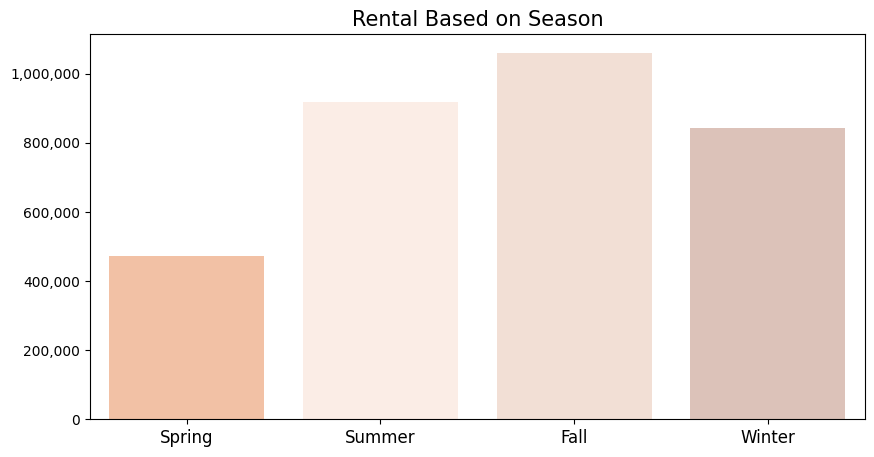

In [ ]:
colors = ['#FFBE98', '#FEECE2', '#F7DED0', '#E2BFB3']
plt.figure(figsize=(10, 5))

sns.barplot(
    y="total_count",
    x="season",
    data=rent_by_season.sort_values(by="total_count", ascending=False),
    palette=colors
)
plt.title("Rental Based on Season", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

So, the highest number of bicycle renters is in fall season

### Pertanyaan 2:

2.   What is the ratio of the number of people who choose registered compared to casual?

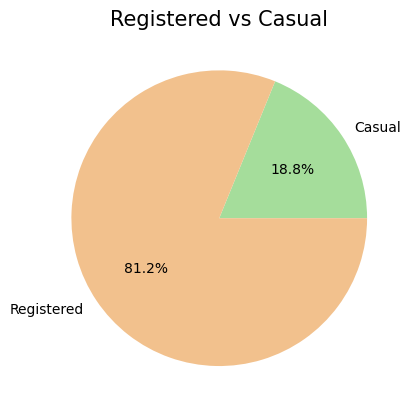

In [ ]:
total_casual = sum(bikeDay['casual'])
total_registered = sum(bikeDay['registered'])

plt.title("Registered vs Casual", loc="center", fontsize=15)
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#A5DD9B", "#F2C18D"])
plt.show()

So, the ratio of the number of people who choose registered and casual is 81.2 : 18.8

## Conclusion

- **Conclution pertanyaan 1**
Based on an analysis of the number of customers based on the season, it can be seen that the most rentals occur in the fall season.

- **Conclution pertanyaan 2**
The ratio of people who have registered is 81.2% while someone who has not registered (casual) is 18.8%

## Advanced Analysis Technoques

***1.Clustering Analysis ***

Clustering based on Season

In [ ]:
bikeHour.groupby(by="season").total_count.nunique().sort_values(ascending=False)

season
Fall      760
Summer    721
Winter    690
Spring    482
Name: total_count, dtype: int64

In conclusion, most users rent bicycles on fall season.

In [ ]:
bikeHour.groupby(by="hour").total_count.nunique().sort_values(ascending=False)

hour
17    494
18    471
8     467
19    423
16    414
14    385
12    383
15    383
13    377
7     374
20    360
11    337
9     322
10    312
21    294
22    252
23    196
6     187
0     162
1     120
2     100
3      60
5      58
4      25
Name: total_count, dtype: int64

Therefore, the majority of users rent bicycles at 17.00.